# KL-Divergence for Approximating a Gaussian Mixture with a Single Gaussian

## Problem Statement

Let's consider the problem of approximating a mixture of Gaussian distributions with a single Gaussian using KL-divergence.

Let the true distribution $p(x)$ be a mixture of two Gaussian distributions:

$$p(x) = \alpha \mathcal{N}(x; \mu_1, \sigma_1^2) + (1-\alpha) \mathcal{N}(x; \mu_2, \sigma_2^2)$$

where:
- $\alpha \in [0,1]$ is the weight of the first component
- $\mathcal{N}(x; \mu, \sigma^2)$ is a Gaussian distribution with mean $\mu$ and variance $\sigma^2$

Our approximating distribution $q(x)$ is a single Gaussian:

$$q(x) = \mathcal{N}(x; \mu_q, \sigma_q^2)$$

We want to find the optimal parameters $\mu_q$ and $\sigma_q^2$ by minimizing either the forward or reverse KL-divergence.

## Forward KL-Divergence (KL(p||q))

The forward KL-divergence is defined as:

$$\text{KL}(p||q) = \int p(x) \log\frac{p(x)}{q(x)} dx$$

For a mixture distribution, this doesn't have a simple closed-form solution, but we can find the optimal parameters analytically.

### Optimal Parameters for Forward KL

To minimize KL(p||q), we need to find parameters that maximize:

$$\int p(x) \log q(x) dx$$

This is equivalent to minimizing:

$$-\int p(x) \log q(x) dx$$

Taking derivatives with respect to $\mu_q$ and $\sigma_q^2$ and setting them to zero:

$$\frac{\partial}{\partial \mu_q} \left[ -\frac{1}{2\sigma_q^2} \int p(x)(x-\mu_q)^2 dx \right] = \frac{1}{\sigma_q^2} \int p(x)(x-\mu_q) dx = 0$$

$$\frac{\partial}{\partial \sigma_q^2} \left[ -\frac{1}{2}\log(2\pi\sigma_q^2) - \frac{1}{2\sigma_q^2} \int p(x)(x-\mu_q)^2 dx \right] = 0$$

From the first equation:

$$\int p(x)(x-\mu_q) dx = 0$$
$$\int p(x)x dx = \mu_q \int p(x) dx$$
$$\mu_q^* = \int p(x)x dx = \mathbb{E}_p[x] = \alpha\mu_1 + (1-\alpha)\mu_2$$

The optimal mean is the weighted average of the component means.

From the second equation:

$$\sigma_q^{2*} = \int p(x)(x-\mu_q^*)^2 dx = \mathbb{E}_p[(x-\mu_q^*)^2]$$

This expands to:

$$\sigma_q^{2*} = \alpha[\sigma_1^2 + (\mu_1-\mu_q^*)^2] + (1-\alpha)[\sigma_2^2 + (\mu_2-\mu_q^*)^2]$$

Substituting $\mu_q^* = \alpha\mu_1 + (1-\alpha)\mu_2$:

$$\sigma_q^{2*} = \alpha\sigma_1^2 + (1-\alpha)\sigma_2^2 + \alpha(1-\alpha)(\mu_1-\mu_2)^2$$

The optimal variance includes the weighted component variances plus an additional term that depends on the distance between means.

### Interpretation

With forward KL-divergence, the approximating distribution $q(x)$ attempts to "cover" all modes of $p(x)$, leading to increased variance. This results in $q(x)$ assigning high probability to regions between modes where $p(x)$ may have low probability, exhibiting "mean-seeking" behavior.

## Reverse KL-Divergence (KL(q||p))

The reverse KL-divergence is defined as:

$$\text{KL}(q||p) = \int q(x) \log\frac{q(x)}{p(x)} dx$$

### Analysis of Reverse KL

For the mixture case, finding an analytical solution is challenging due to the log-sum term:

$$\int q(x) \log p(x) dx = \int q(x) \log[\alpha \mathcal{N}(x; \mu_1, \sigma_1^2) + (1-\alpha) \mathcal{N}(x; \mu_2, \sigma_2^2)] dx$$

However, we can analyze limiting cases and use numerical methods to understand the behavior.

### Key Insight: Mode-Seeking Behavior

For reverse KL-divergence, the optimal solution tends to concentrate on one of the modes of $p(x)$, especially when the modes are well-separated.

Depending on initial conditions, $q(x)$ may converge to one of the following regimes:

1. **Mode 1**: $q(x)$ concentrates around the first component:
   $$\mu_q^* \approx \mu_1, \sigma_q^{2*} \approx \sigma_1^2$$

2. **Mode 2**: $q(x)$ concentrates around the second component:
   $$\mu_q^* \approx \mu_2, \sigma_q^{2*} \approx \sigma_2^2$$

The global minimum typically corresponds to the mode with the larger weight. If $\alpha > 0.5$, the solution tends to converge to the first mode, and if $\alpha < 0.5$, to the second mode.

## Mathematical Proof of Mode-Seeking Behavior

When the modes are well-separated (i.e., $|\mu_1 - \mu_2| \gg \max(\sigma_1, \sigma_2)$), we can approximate:

$$\log[\alpha \mathcal{N}(x; \mu_1, \sigma_1^2) + (1-\alpha) \mathcal{N}(x; \mu_2, \sigma_2^2)] \approx \max\{\log(\alpha \mathcal{N}(x; \mu_1, \sigma_1^2)), \log((1-\alpha) \mathcal{N}(x; \mu_2, \sigma_2^2))\}$$

The space $\mathbb{R}$ can be divided into two regions:
- $R_1 = \{x : \alpha \mathcal{N}(x; \mu_1, \sigma_1^2) > (1-\alpha) \mathcal{N}(x; \mu_2, \sigma_2^2)\}$
- $R_2 = \{x : \alpha \mathcal{N}(x; \mu_1, \sigma_1^2) < (1-\alpha) \mathcal{N}(x; \mu_2, \sigma_2^2)\}$

The boundary is approximately at:

$$x_0 = \frac{\mu_1 + \mu_2}{2} + \frac{\sigma^2}{(\mu_2 - \mu_1)}\log\frac{1-\alpha}{\alpha}$$

Analyzing the KL-divergence for $q$ concentrated at each mode:

- **Case 1**: $q$ matches the first mode: $\mu_q \approx \mu_1$, $\sigma_q \approx \sigma_1$
  $$\text{KL}(q||p) \approx -\log\alpha + \text{constant}$$

- **Case 2**: $q$ matches the second mode: $\mu_q \approx \mu_2$, $\sigma_q \approx \sigma_2$
  $$\text{KL}(q||p) \approx -\log(1-\alpha) + \text{constant}$$

Comparing these values:
- If $\alpha > 0.5$, then $-\log\alpha < -\log(1-\alpha)$, making Case 1 the global minimum
- If $\alpha < 0.5$, then $-\log\alpha > -\log(1-\alpha)$, making Case 2 the global minimum

## Comparison and Visualization

### Forward KL (KL(p||q)):
- Mean: $\mu_q^* = \alpha\mu_1 + (1-\alpha)\mu_2$
- Variance: $\sigma_q^{2*} = \alpha\sigma_1^2 + (1-\alpha)\sigma_2^2 + \alpha(1-\alpha)(\mu_1-\mu_2)^2$
- Behavior: "Mean-seeking" - tries to cover all modes, results in higher variance

### Reverse KL (KL(q||p)):
- If $\alpha > 0.5$: $\mu_q^* \approx \mu_1$, $\sigma_q^{2*} \approx \sigma_1^2$
- If $\alpha < 0.5$: $\mu_q^* \approx \mu_2$, $\sigma_q^{2*} \approx \sigma_2^2$
- Behavior: "Mode-seeking" - concentrates on the dominant mode, ignores other modes

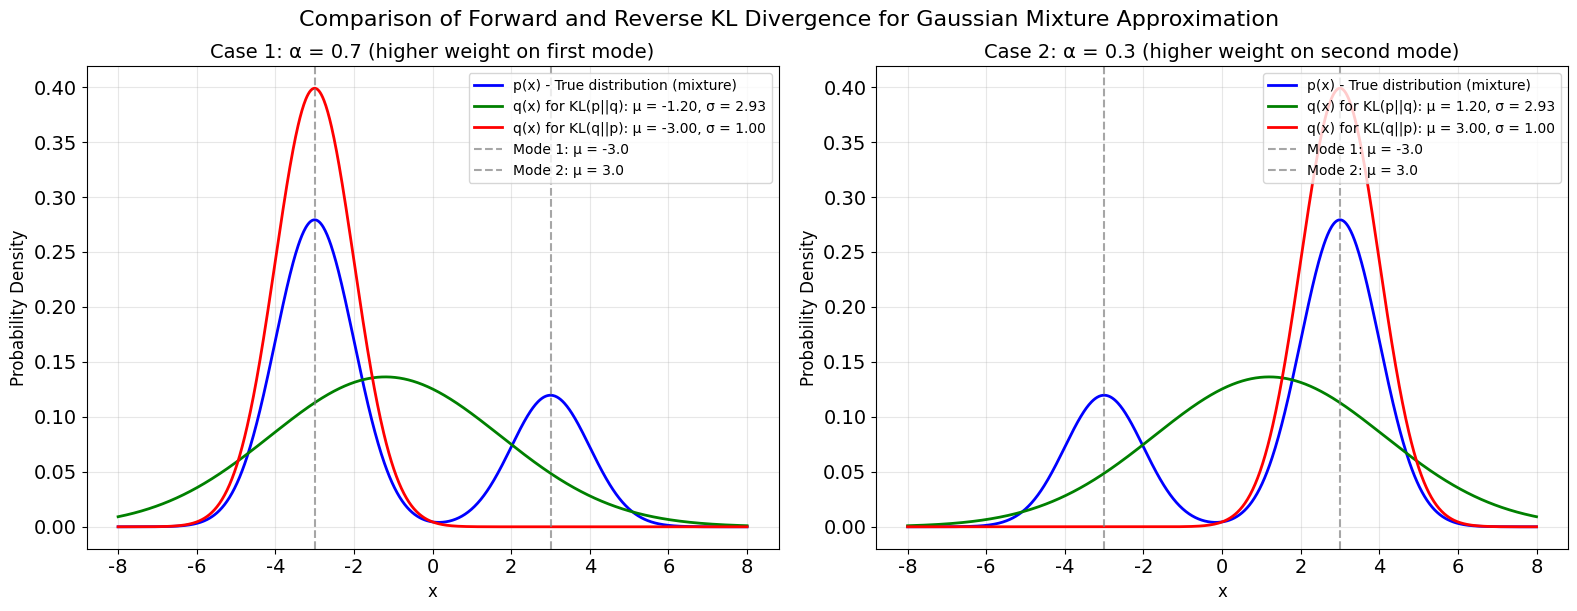

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm

# Set font
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Function to calculate normal PDF
def gaussian_pdf(x, mu, sigma):
    """Normal distribution probability density function"""
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Function to calculate mixture PDF
def mixture_pdf(x, alpha, mu1, sigma1, mu2, sigma2):
    """Probability density function of a mixture of normal distributions"""
    return alpha * gaussian_pdf(x, mu1, sigma1) + (1-alpha) * gaussian_pdf(x, mu2, sigma2)

# Function to calculate forward KL optimal parameters
def forward_kl_optimal(alpha, mu1, sigma1, mu2, sigma2):
    """Optimal parameters for forward KL divergence"""
    mu_q = alpha * mu1 + (1-alpha) * mu2
    sigma_q_squared = alpha * sigma1**2 + (1-alpha) * sigma2**2 + alpha * (1-alpha) * (mu1 - mu2)**2
    sigma_q = np.sqrt(sigma_q_squared)
    return mu_q, sigma_q

# Create figure with 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cases to visualize
cases = [
    {"alpha": 0.7, "title": "Case 1: α = 0.7 (higher weight on first mode)"},
    {"alpha": 0.3, "title": "Case 2: α = 0.3 (higher weight on second mode)"}
]

for i, case in enumerate(cases):
    alpha = case["alpha"]
    mu1, sigma1 = -3.0, 1.0  # Parameters of the first mode
    mu2, sigma2 = 3.0, 1.0   # Parameters of the second mode
    
    # Calculate optimal parameters for forward KL
    forward_mu, forward_sigma = forward_kl_optimal(alpha, mu1, sigma1, mu2, sigma2)
    
    # For reverse KL, we assume it converges to the mode with larger weight
    if alpha > 0.5:
        reverse_mu, reverse_sigma = mu1, sigma1
    else:
        reverse_mu, reverse_sigma = mu2, sigma2
    
    # Generate x values and calculate PDFs
    x = np.linspace(-8, 8, 1000)
    true_mixture = [mixture_pdf(xi, alpha, mu1, sigma1, mu2, sigma2) for xi in x]
    forward_approx = [gaussian_pdf(xi, forward_mu, forward_sigma) for xi in x]
    reverse_approx = [gaussian_pdf(xi, reverse_mu, reverse_sigma) for xi in x]
    
    # Display the distributions
    ax = axes[i]
    ax.plot(x, true_mixture, 'b-', linewidth=2, label='p(x) - True distribution (mixture)')
    ax.plot(x, forward_approx, 'g-', linewidth=2, 
            label=f'q(x) for KL(p||q): μ = {forward_mu:.2f}, σ = {forward_sigma:.2f}')
    ax.plot(x, reverse_approx, 'r-', linewidth=2, 
            label=f'q(x) for KL(q||p): μ = {reverse_mu:.2f}, σ = {reverse_sigma:.2f}')
    
    # Add vertical lines for the modes
    ax.axvline(x=mu1, color='gray', linestyle='--', alpha=0.7, label=f'Mode 1: μ = {mu1}')
    ax.axvline(x=mu2, color='gray', linestyle='--', alpha=0.7, label=f'Mode 2: μ = {mu2}')
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.set_title(case["title"], fontsize=14)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Comparison of Forward and Reverse KL Divergence for Gaussian Mixture Approximation', 
             fontsize=16, y=1.02)
plt.savefig('kl_divergence_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()